# INSY695 - Group Project
### Visualization - Bogdan Tanasie

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
assert sys.version_info >= (3, 5)

In [20]:
bpd_df = pd.read_csv('../data/BPD_CRIME_DATA_CLEAN.csv')
bpd_encoded_df = pd.read_csv('../data/BPD_CRIME_DATA_ENCODED.csv')

In [23]:
# Where to save the figures
def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join('./images/', fig_id + '.' + fig_extension)
    print('Saving figure', fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [24]:
bpd_df.shape 

(276529, 18)

In [25]:
bpd_df = bpd_df[bpd_df.Weapon != 'NONE']
bpd_df.shape

(95577, 18)

In [26]:
bpd_df.head(3)

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents,Season,Month,Hour
0,2017-09-02,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,Inside,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1,summer,9,23
2,2017-09-02,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",STREET,1,summer,9,22
3,2017-09-02,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,Inside,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,"(39.2831500000, -76.6452600000)",ROW/TOWNHO,1,summer,9,22


In [27]:
bpd_df.columns

Index(['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Description',
       'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood',
       'Longitude', 'Latitude', 'Location 1', 'Premise', 'Total Incidents',
       'Season', 'Month', 'Hour'],
      dtype='object')

Saving figure map1


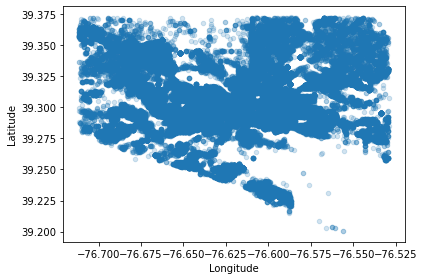

In [31]:
bpd_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2)
save_fig('map1')

In [29]:
bpd_df['Count_By_Neighborhood'] = bpd_df.groupby(['Neighborhood'])['Total Incidents'].transform('count')
bpd_df['Count_By_Neighborhood']

0         1927.0
2          187.0
3         1155.0
4          241.0
6          790.0
           ...  
276504     406.0
276515     886.0
276516    2043.0
276517     506.0
276518     461.0
Name: Count_By_Neighborhood, Length: 95577, dtype: float64

In [30]:
bpd_counts_df = bpd_df.groupby(['Neighborhood'])['Total Incidents'].agg(pd.Series.count).to_frame().sort_values(by='Total Incidents', ascending=False)
bpd_counts_df

,Total Incidents
Neighborhood,
Downtown,3277
Frankford,2306
Belair-Edison,2043
Sandtown-Winchester,1994
Brooklyn,1927
...,...
The Orchards,4
Curtis Bay Industrial Are,4
Bellona-Gittings,2


Saving figure map2


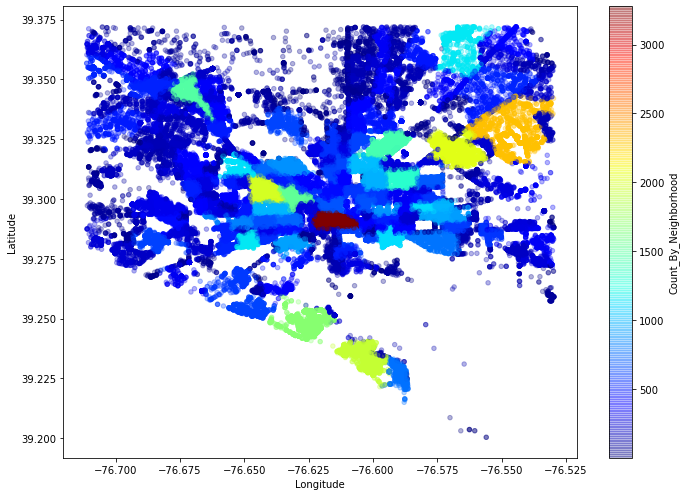

In [35]:
bpd_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.3, figsize=(10,7),
            c='Count_By_Neighborhood', cmap=plt.get_cmap('jet'), sharex=False)
save_fig('map2')

In [36]:
# Going to look at the top wepon per region
bpd_weapons_df = bpd_df.groupby(['Neighborhood', 'Weapon'], as_index=False)['Total Incidents'].agg(pd.Series.count)
bpd_weapons_df

,Neighborhood,Weapon,Total Incidents
0,Abell,FIREARM,64
1,Abell,HANDS,96
2,Abell,KNIFE,23
3,Abell,OTHER,29
4,Allendale,FIREARM,117
...,...,...,...
1075,Yale Heights,OTHER,29
1076,York-Homeland,FIREARM,6
1077,York-Homeland,HANDS,29
1078,York-Homeland,KNIFE,10


Saving figure cat_plot1


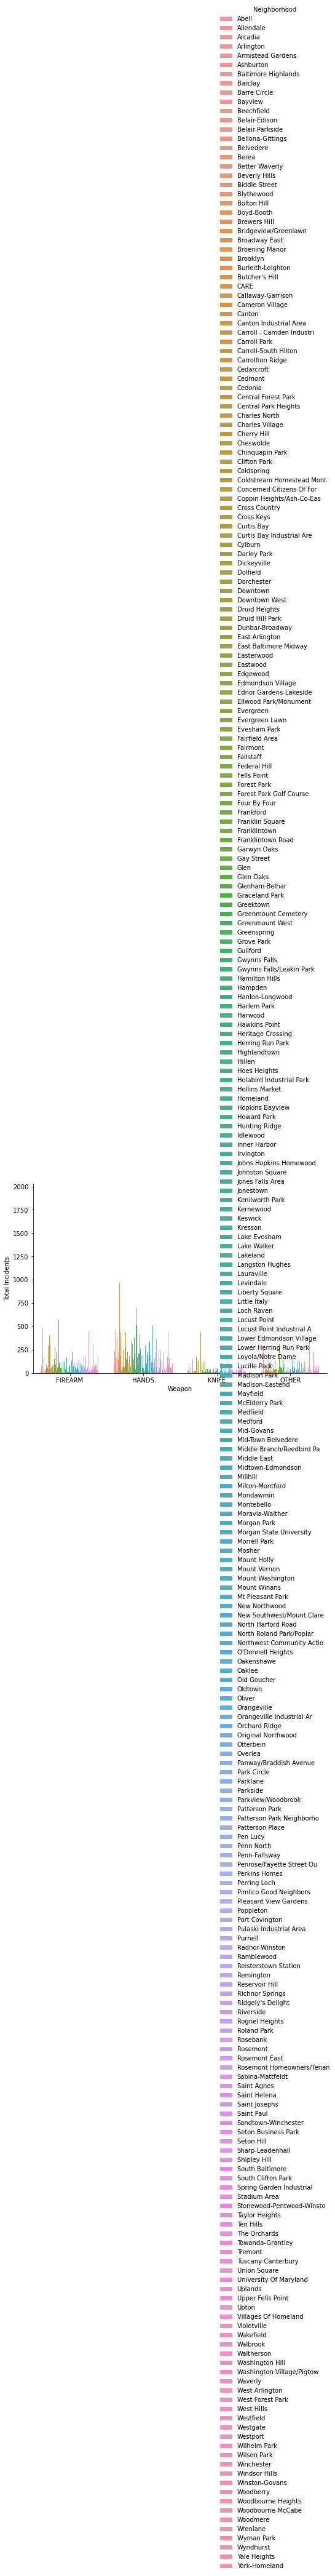

In [37]:
# Create map with groups and histogram (maybe we can separate this by neighborhood)
sns.catplot(x='Weapon', y='Total Incidents', hue='Neighborhood', kind='bar', data=bpd_weapons_df)
save_fig('cat_plot1')

Saving figure cat_plot2


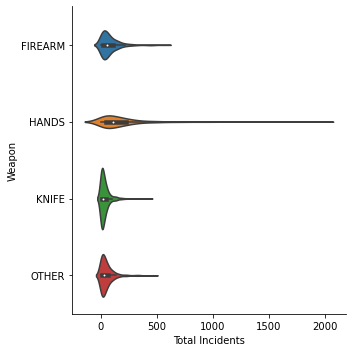

In [39]:
sns.catplot(x='Total Incidents', y='Weapon', kind='violin', data=bpd_weapons_df)
save_fig('cat_plot2')